# Question 1A

**Briefly explain in 1-2 sentences the concepts of Covariance and Correlation, and
describe their relationship. You may use equations for clarification**

Correlation specifically quantifies the strength and direction of a linear relationship between two variables, whereas covariance examines any sort of joint variability. Moreover, correlation standardizes the covariance by standard deviation of both variables, which eliminates the units and scales the result to between -1 and 1 (effectively comparing the z-scores of the two variables).

We can look at the following equations to better understand the difference:
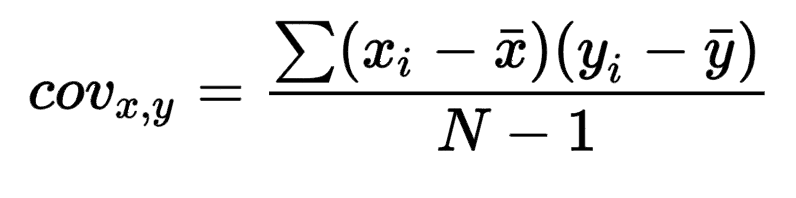

And Correlation:

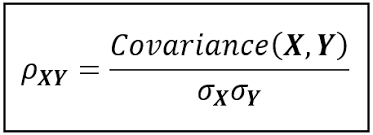

Covariance takes the product of the standard deviation for each variable, which tells us how at each data point, the two variables change together. If both variables are negative or positive, the product yields a positive covariance, i.e. they move together (otherwise a negative product shows they move in opposite directions, and a near-zero product shows no relationship). It then sums over all samples of n, and divides by (n-1) (rather than n, to correct for any bias in the samples).

We can thus see the correlation is simply the standardized covariance - i.e. obtained by dividing the covariance by the product of the standard deviation of both variables (giving us the z-scores).

# Question 1B
**Load the Iris dataset, using any method of your choice (e.g.: pd.read_csv("iris.csv")
in Pandas).
Use visualization to explore the relationship between the different features.**

In [2]:
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

# Question 1B - load the iris dataset
iris_df = sns.load_dataset("iris")
iris_df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


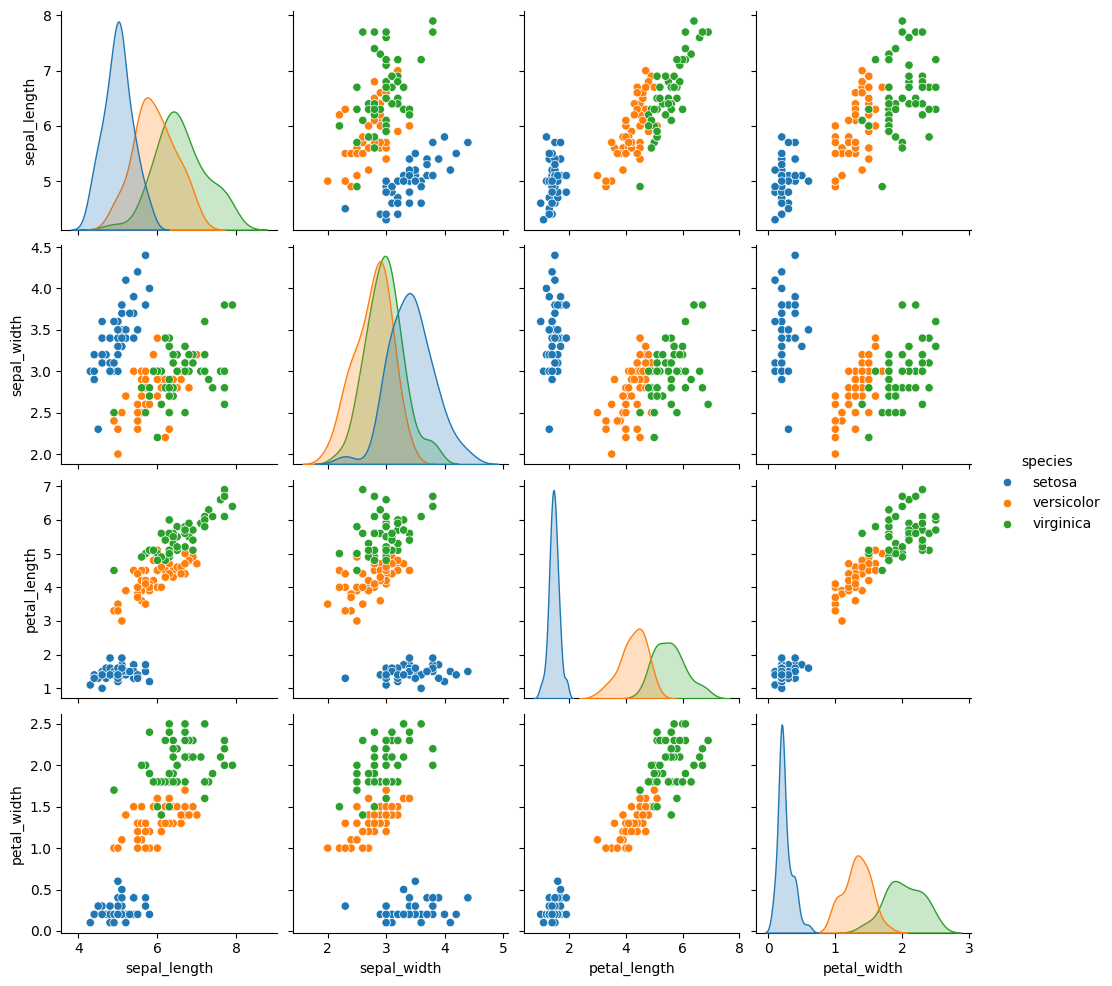

In [3]:
iris_df.info()

# pairplot to see how each pair of features relates to each other, per species
sns.pairplot(iris_df, hue="species", height=2.5)

In [4]:
# NOTE: this doesn't render in GitHub - so there is a PNG version saved in this project called iris_features.png
# 3D plot to see how the features change per species - virginica and versicolor are more similar

fig = px.scatter_3d(
    iris_df,
    x="sepal_length",
    y="sepal_width",
    z="petal_length",
    size="petal_width",
    color="species",
    hover_name="species",
)
# change default zoom out to see the whole graph
# update margins to see the graph more easily
fig.update_layout(
    title="Iris Features (point size = petal width)",
    scene_camera={"eye": {"x": 2, "y": 2, "z": 1}},
    margin={"l": 0, "r": 0, "b": 5, "t": 50},
)
fig.show()

NOTE: This doesn't render in GitHub - so there is a PNG version saved in this project called iris_features.png.

# Question 1C

**Implement the following functions:
a. A function to calculate the covariance between two variables:
def calcCov(x, y): <your implementation here>,
b. A function to compute the Covariance matrix:
def covMat(data): <your implementation here>
covMat(data) should return an n by n covariance matrix, where n is the
number of features (in case of the iris dataset n=4)**

In [5]:
import numpy as np


# function to calculate the covariance between two variables
# let's just assume x and y are arrays bc it doesn't tell us in the HW instructions
def calcCov(x, y):
    # numpy for operations
    x = np.array(x)
    y = np.array(y)
    # implement sum over all product of deviation from the mean
    n = len(x)
    x_deviations = np.array(x) - x.mean()
    y_deviations = np.array(y) - y.mean()
    return np.sum(x_deviations * y_deviations) / (n - 1)


# function to compute the Covariance matrix
# I guess we're assuming data is a pandas dataframe...
# also assume that all data is numeric and we don't need to clean out any columns
def covMat(data):
    # create array for storing output
    output_matrix = np.zeros((len(data.columns), len(data.columns)))
    # calculate covar matrix using our calcCov function
    for i in range(len(data.columns)):
        var1 = data.columns[i]
        for j in range(len(data.columns)):
            var2 = data.columns[j]
            covariance = calcCov(data[var1], data[var2])
            output_matrix[i, j] = covariance
    return output_matrix


# only choose numeric columns (can't e.g. do covar on the species column bc they're strings)
iris_numeric = iris_df.select_dtypes(include=["int64", "float64"])
print(iris_numeric.head())
my_covar_iris = covMat(iris_numeric)
print(my_covar_iris)

   sepal_length  sepal_width  petal_length  petal_width
0           5.1          3.5           1.4          0.2
1           4.9          3.0           1.4          0.2
2           4.7          3.2           1.3          0.2
3           4.6          3.1           1.5          0.2
4           5.0          3.6           1.4          0.2
[[ 0.68569351 -0.042434    1.27431544  0.51627069]
 [-0.042434    0.18997942 -0.32965638 -0.12163937]
 [ 1.27431544 -0.32965638  3.11627785  1.2956094 ]
 [ 0.51627069 -0.12163937  1.2956094   0.58100626]]


# Question 1D
**Test1: compare the results of your function with NumPy's
np.cov(data,rowvar=False) using the iris dataset.**

In [6]:
numpy_covar_iris = np.cov(iris_numeric, rowvar=False)
print(numpy_covar_iris)

print("\nChecking if our solution is equivalent to numpy (True/False at each point):")
np.round(my_covar_iris, 10) == np.round(numpy_covar_iris, 10)

[[ 0.68569351 -0.042434    1.27431544  0.51627069]
 [-0.042434    0.18997942 -0.32965638 -0.12163937]
 [ 1.27431544 -0.32965638  3.11627785  1.2956094 ]
 [ 0.51627069 -0.12163937  1.2956094   0.58100626]]

Checking if our solution is equivalent to numpy (True/False at each point):


array([[ True,  True,  True,  True],
       [ True,  True,  True,  True],
       [ True,  True,  True,  True],
       [ True,  True,  True,  True]])

# Question 1E
**Using your covariance function, implement a function to calculate the correlation
matrix:
def corrMat(data):
<should use covMat(data) and return the correlation matrix>**

In [7]:
# calculate covariance matrix using our existing covMat function
def corrMat(data):
    # calculate covMat first
    covariance_matrix = covMat(data)
    # calculate standard deviation of variables and divide
    standard_dev = np.std(data, axis=0)
    # create array for storing output
    output_matrix = np.zeros((len(data.columns), len(data.columns)))
    # divide matrix by product of standard deviations for each
    for i in range(len(data.columns)):
        for j in range(len(data.columns)):
            output_matrix[i, j] = covariance_matrix[i, j] / (standard_dev[i] * standard_dev[j])
    return output_matrix


my_corr_iris = corrMat(iris_numeric)
print(my_corr_iris)

[[ 1.00671141 -0.11835884  0.87760447  0.82343066]
 [-0.11835884  1.00671141 -0.43131554 -0.36858315]
 [ 0.87760447 -0.43131554  1.00671141  0.96932762]
 [ 0.82343066 -0.36858315  0.96932762  1.00671141]]


/var/folders/_7/5lr75rs52t93wgsgbtmqtxtc0000gn/T/ipykernel_58721/1627371631.py:12: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`



# 1F
**Test2: validate your correlation matrix implementation by comparing it with the
results of NumPy's np.corrcoef(data,rowvar=False), using the iris dataset.**

In [8]:
numpy_corr_iris = np.corrcoef(iris_numeric, rowvar=False)
print(numpy_corr_iris)

print("\nChecking if our solution is equivalent to numpy (True/False at each point):")
print(np.round(my_corr_iris, 5) == np.round(numpy_corr_iris, 5))
print(
    "This only works if we round to 1 decimal place bc our results are actually off enough, checking rounding for 1 place:"
)
print(np.round(my_corr_iris, 1) == np.round(numpy_corr_iris, 1))

[[ 1.         -0.11756978  0.87175378  0.81794113]
 [-0.11756978  1.         -0.4284401  -0.36612593]
 [ 0.87175378 -0.4284401   1.          0.96286543]
 [ 0.81794113 -0.36612593  0.96286543  1.        ]]

Checking if our solution is equivalent to numpy (True/False at each point):
[[False False False False]
 [False False False False]
 [False False False False]
 [False False False False]]
This only works if we round to 1 decimal place bc our results are actually off enough, checking rounding for 1 place:
[[ True  True  True  True]
 [ True  True  True  True]
 [ True  True  True  True]
 [ True  True  True  True]]


# Question 1G
**Use visualizations to communicate the tests results. Include appropriate titles,
axis labels, and colorbars where relevant.**

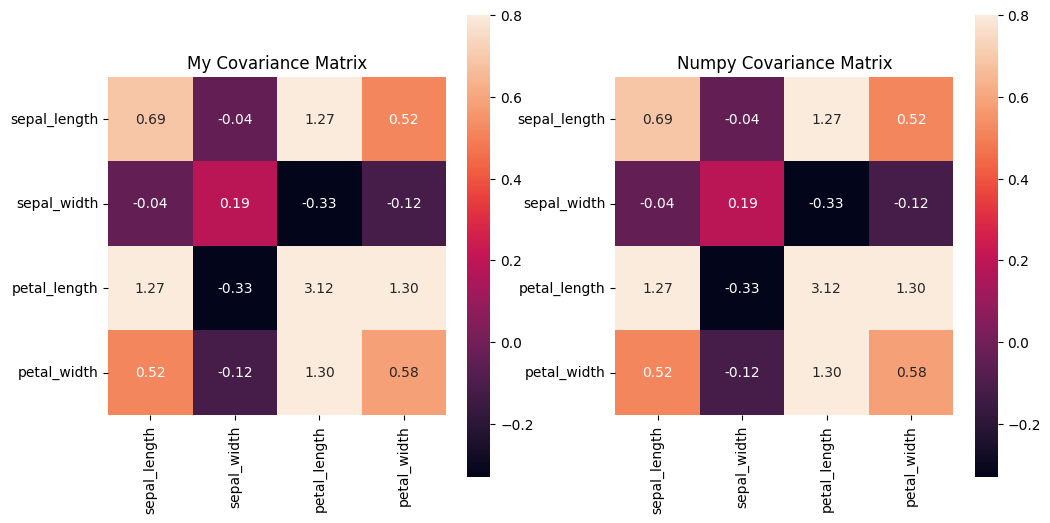

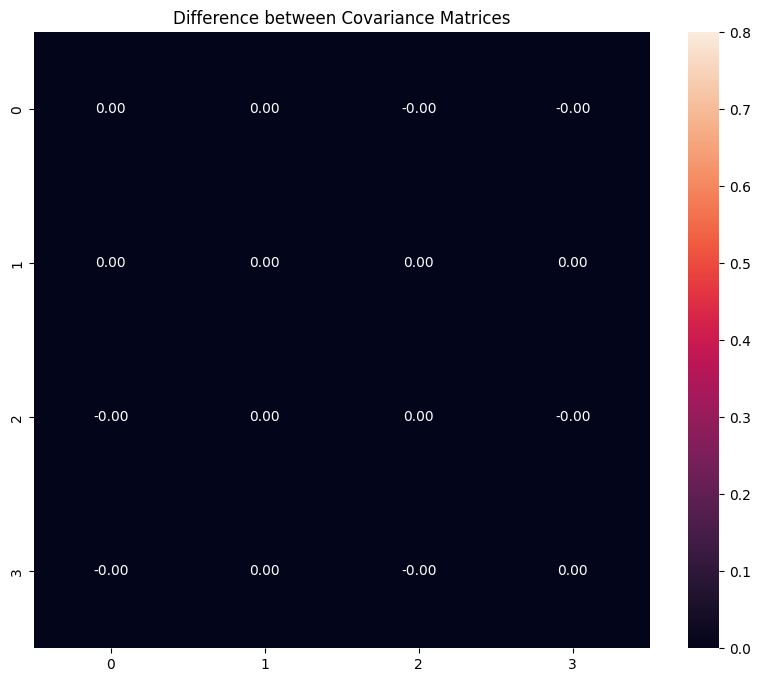

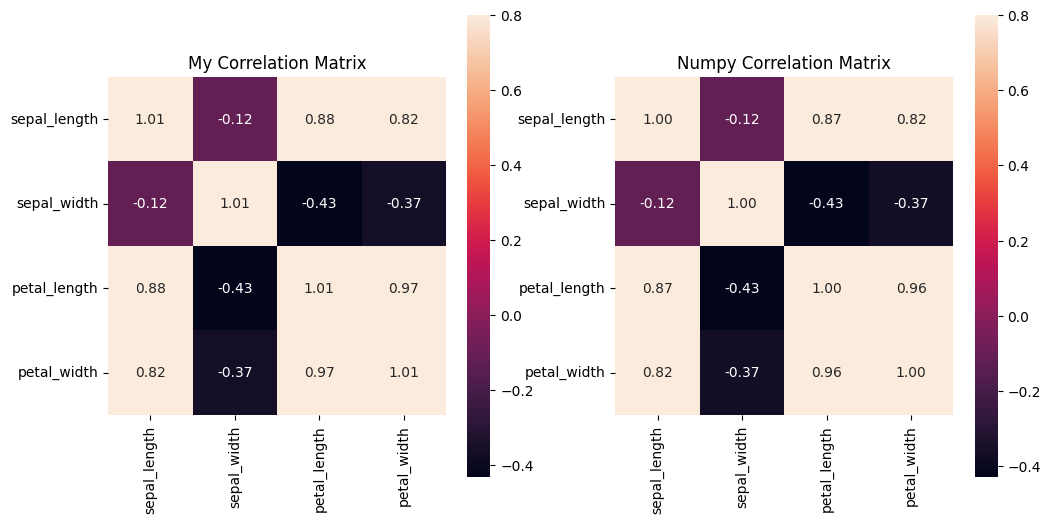

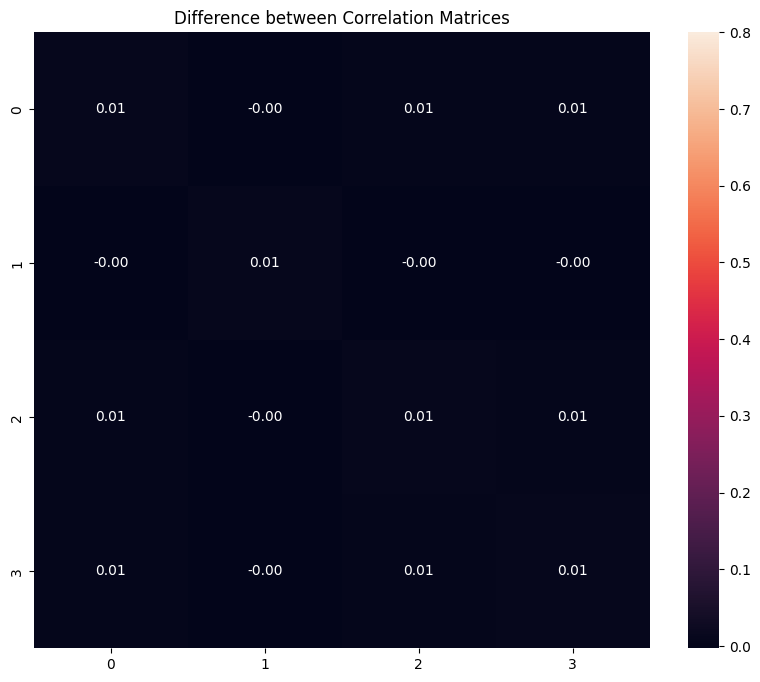


Thus we can see per results above, my implemented functions and numpy functions are very close.


In [9]:
import seaborn as sns

feature_names = ["sepal_length", "sepal_width", "petal_length", "petal_width"]

# plot the covariance matrices that we got versus numpy
f, ax = plt.subplots(1, 2, figsize=(12, 6))
sns.heatmap(
    my_covar_iris,
    vmax=0.8,
    square=True,
    annot=True,
    fmt=".2f",
    annot_kws={"size": 10},
    xticklabels=feature_names,
    yticklabels=feature_names,
    ax=ax[0],
)
ax[0].set_title("My Covariance Matrix")

sns.heatmap(
    numpy_covar_iris,
    vmax=0.8,
    square=True,
    annot=True,
    fmt=".2f",
    annot_kws={"size": 10},
    xticklabels=feature_names,
    yticklabels=feature_names,
    ax=ax[1],
)
ax[1].set_title("Numpy Covariance Matrix")
plt.show()

# calculate a difference matrix for covariance
difference_matrix = my_covar_iris - numpy_covar_iris

plt.figure(figsize=(10, 8))
sns.heatmap(difference_matrix, vmax=0.8, square=True, annot=True, fmt=".2f", annot_kws={"size": 10})

plt.title("Difference between Covariance Matrices")
plt.show()

print("\n\n")

# plot the correlation matrices that we got versus numpy
f, ax = plt.subplots(1, 2, figsize=(12, 6))
sns.heatmap(
    my_corr_iris,
    vmax=0.8,
    square=True,
    annot=True,
    fmt=".2f",
    annot_kws={"size": 10},
    xticklabels=feature_names,
    yticklabels=feature_names,
    ax=ax[0],
)
ax[0].set_title("My Correlation Matrix")

sns.heatmap(
    numpy_corr_iris,
    vmax=0.8,
    square=True,
    annot=True,
    fmt=".2f",
    annot_kws={"size": 10},
    xticklabels=feature_names,
    yticklabels=feature_names,
    ax=ax[1],
)
ax[1].set_title("Numpy Correlation Matrix")
plt.show()

# calculate a difference matrix for correlation
difference_matrix = my_corr_iris - numpy_corr_iris

plt.figure(figsize=(10, 8))
sns.heatmap(difference_matrix, vmax=0.8, square=True, annot=True, fmt=".2f", annot_kws={"size": 10})

plt.title("Difference between Correlation Matrices")
plt.show()

print("\nThus we can see per results above, my implemented functions and numpy functions are very close.")

# Question 2

**For this question you will use the dataset titled “laptop-price – dataset.csv”.
Import the libraries mentioned above and import the dataset from your filesystem into the
code.
Please write code to complete the following tasks with this dataset:**
* Plot the price of all the laptops
* Which company has on average the most expensive laptop? What is the average
laptop price for each company?
* Find the different types of Operating systems present in the data - under the column
name "OpSys".
** Please note - there are operating systems that are the same systems and just
written differently in the column - please fix them to be uniform.
* Plot for each of the operating system types the distribution of the prices, so that the
number of plots equals to the number of unique operating systems.
* What is the relationship between RAM and computer price? add an adequate plot to
support your findings.
* Create a new column for the dataframe called "Storage type" that extracts the
storage type from the column "Memory".
o For example, in the first row in the column "Memory" it states "128GB SSD",
the new column will have just "SSD" in its first row.

**All plots must be plotted with axes titles and units as well as plot titles.**

In [10]:
# import NumPy, Pandas, MatPlotLib/Seaborn/Plotly:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import plotly.express as px
import seaborn as sns

In [11]:
df = pd.read_csv("laptop_price - dataset.csv")

In [12]:
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1275 entries, 0 to 1274
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Company              1275 non-null   object 
 1   Product              1275 non-null   object 
 2   TypeName             1275 non-null   object 
 3   Inches               1275 non-null   float64
 4   ScreenResolution     1275 non-null   object 
 5   CPU_Company          1275 non-null   object 
 6   CPU_Type             1275 non-null   object 
 7   CPU_Frequency (GHz)  1275 non-null   float64
 8   RAM (GB)             1275 non-null   int64  
 9   Memory               1275 non-null   object 
 10  GPU_Company          1275 non-null   object 
 11  GPU_Type             1275 non-null   object 
 12  OpSys                1275 non-null   object 
 13  Weight (kg)          1275 non-null   float64
 14  Price (Euro)         1275 non-null   float64
dtypes: float64(4), int64(1), object(10)
me

* **Plot the price of all the laptops**

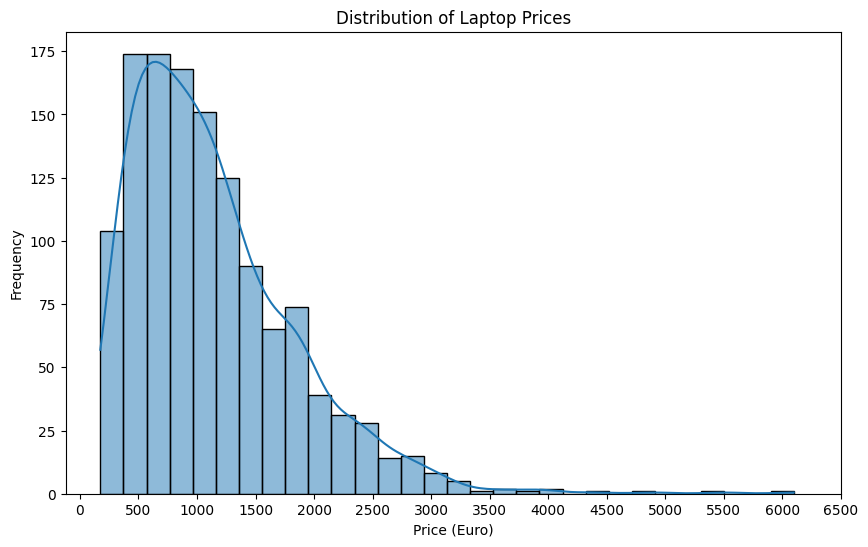

In [13]:
# plot the price of all laptops
plt.figure(figsize=(10, 6))
sns.histplot(df["Price (Euro)"], bins=30, kde=True)
plt.title("Distribution of Laptop Prices")
plt.xlabel("Price (Euro)")
plt.ylabel("Frequency")
# add more xticks
plt.xticks(np.arange(0, 7000, 500))
plt.show()

* **Which company has on average the most expensive laptop? What is the average
laptop price for each company?**

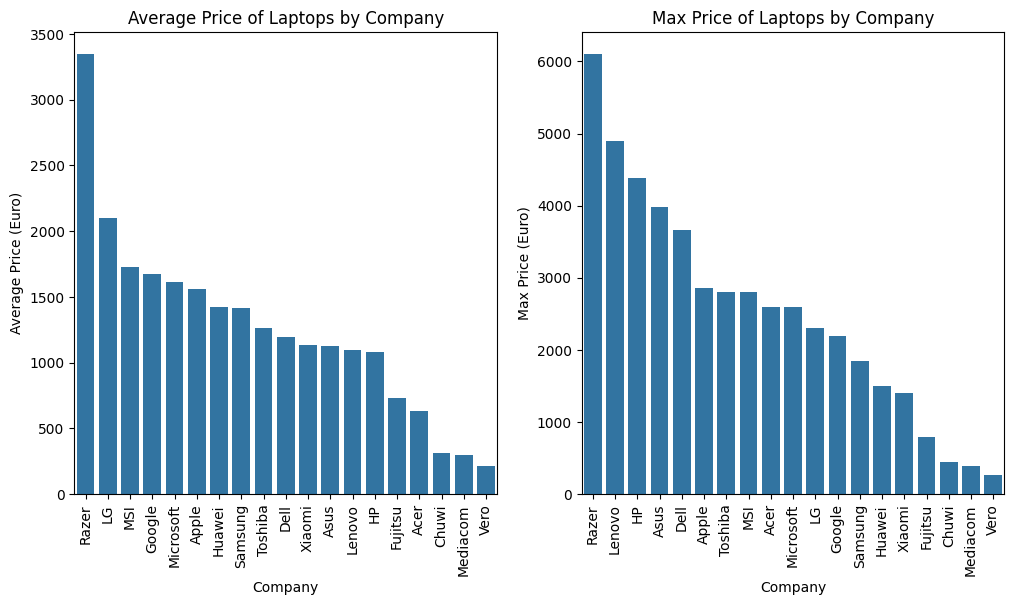

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

In [14]:
# plot the average price of a laptop per company
f, ax = plt.subplots(1, 2, figsize=(12, 6))

average_price_per_company = df.groupby("Company")["Price (Euro)"].mean()
plt.figure(figsize=(10, 6))
sns.barplot(
    x=average_price_per_company.index,
    y=average_price_per_company.values,
    ax=ax[0],
    order=average_price_per_company.sort_values(ascending=False).index,
)
ax[0].tick_params(axis="x", rotation=90)
ax[0].set_xlabel("Company")
ax[0].set_ylabel("Average Price (Euro)")
ax[0].set_title("Average Price of Laptops by Company")

# plot the max price of the laptop per company
max_price_per_company = df.groupby("Company")["Price (Euro)"].max()
plt.figure(figsize=(10, 6))
sns.barplot(
    x=max_price_per_company.index,
    y=max_price_per_company.values,
    ax=ax[1],
    order=max_price_per_company.sort_values(ascending=False).index,
)
ax[1].tick_params(axis="x", rotation=90)
ax[1].set_xlabel("Company")
ax[1].set_ylabel("Max Price (Euro)")
ax[1].set_title("Max Price of Laptops by Company")

plt.show()

Per the above graphs - it looks like Razer has the most expensive laptops on average, as well as the most expensive laptop generally across all companies. We can see the average price of a laptop at most companies is around 1200-1500 euros.

* **Find the different types of Operating systems present in the data - under the column
name "OpSys".**
** Please note - there are operating systems that are the same systems and just
written differently in the column - please fix them to be uniform.

In [15]:
# list different operating systems in the data
uniques = df["OpSys"].unique()
print(f"Unique OS in the data ({len(uniques)}):\n{ uniques }")

Unique OS in the data (9):
['macOS' 'No OS' 'Windows 10' 'Mac OS X' 'Linux' 'Android' 'Windows 10 S'
 'Chrome OS' 'Windows 7']


In [16]:
# make the same system names uniform
df["OpSys"] = df["OpSys"].replace("Mac OS X", "macOS")
df["OpSys"] = df["OpSys"].replace("Windows 10 S", "Windows 10")
new_uniques = df["OpSys"].unique()
print(f"Cleaned unique OS in the data ({len(new_uniques)}):\n{ new_uniques }")

Cleaned unique OS in the data (7):
['macOS' 'No OS' 'Windows 10' 'Linux' 'Android' 'Chrome OS' 'Windows 7']


Thus the different OS we have in the dataset, including "No OS" as an option: ['macOS' 'No OS' 'Windows 10' 'Linux' 'Android' 'Chrome OS' 'Windows 7']


* **Plot for each of the operating system types the distribution of the prices, so that the
number of plots equals to the number of unique operating systems.**

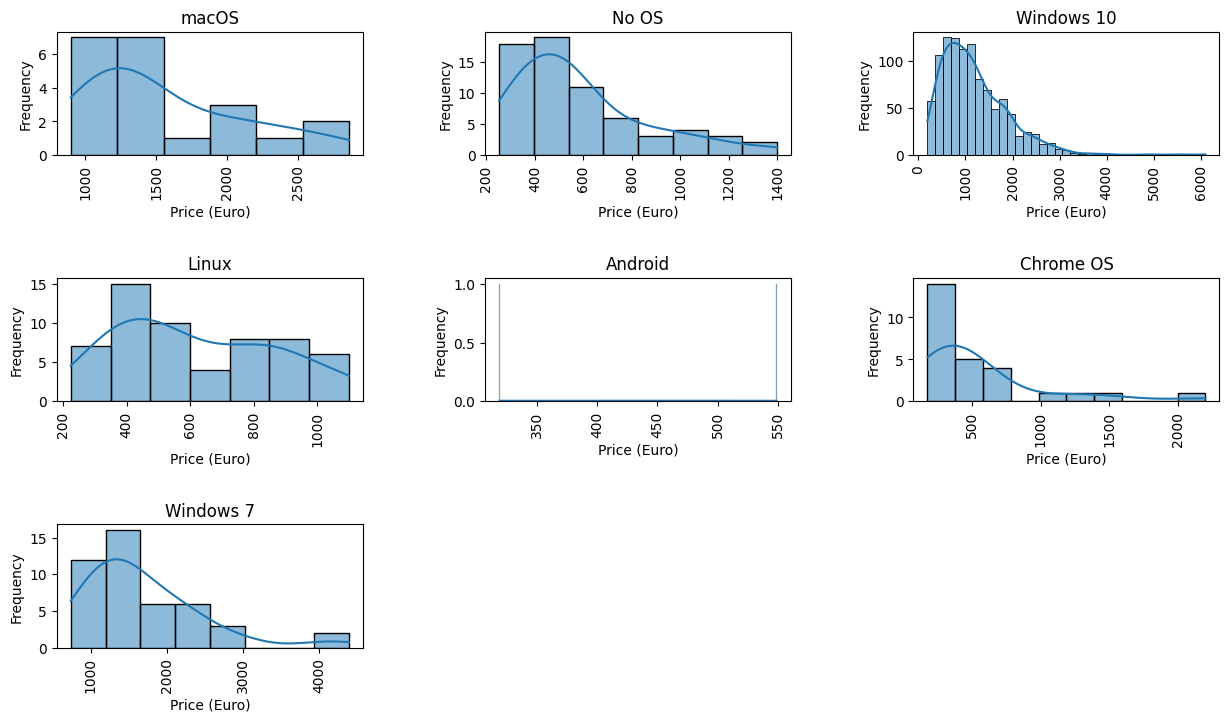

In [17]:
# create subplots: for each OS and its distribution of prices
# NOTE: we will still plot No OS rather than drop this data

import math

fig, axs = plt.subplots(3, math.ceil(len(new_uniques) / 3), figsize=(15, 8))
fig.subplots_adjust(hspace=1, wspace=0.4)

axs = axs.ravel()

for i in range(len(new_uniques)):
    # make the data more readable - e.g. for Android we only have 2 data points
    discrete_val = False
    if len(df[df["OpSys"] == new_uniques[i]]) < 10:
        discrete_val = True

    axs[i] = sns.histplot(
        data=df[df["OpSys"] == new_uniques[i]], x="Price (Euro)", ax=axs[i], kde=True, discrete=discrete_val
    )
    axs[i].set_title(new_uniques[i])
    axs[i].set_xlabel("Price (Euro)")
    axs[i].set_ylabel("Frequency")
    axs[i].tick_params(axis="x", rotation=90)


# remove excess axes
for i in range(len(new_uniques), len(axs)):
    fig.delaxes(axs[i])

plt.show()

* **What is the relationship between RAM and computer price? add an adequate plot to support your findings.**

In [18]:
# NOTE: THE BOX PLOT DOESN'T RENDER. INCLUDED IS box_plot_RAM.png IN THE FILES.
# plot the relationship between RAM and computer price

fig = px.box(df, x="RAM (GB)", y="Price (Euro)")
# change x ticks scale
fig.update_xaxes(tickmode="array", tickvals=[4, 8, 16, 32, 64], range=(0, 70))
fig.update_layout(
    title="Distribution of Prices for GB of RAM",
    xaxis_title="RAM (GB)",
    yaxis_title="Price (Euro)",
    width=600,
    height=400,
)
fig.show()

NOTE: THE BOX PLOT DOESN'T RENDER in GITHUB. INCLUDED IS box_plot_RAM.png IN THE FILES.


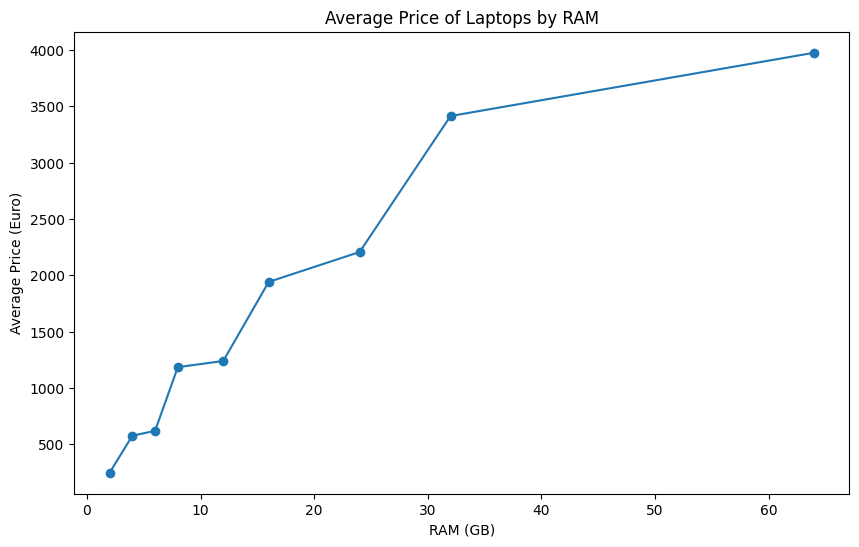

In [19]:
# group by amount of RAM
# calculate and plot the mean
avg_data = df.groupby("RAM (GB)")["Price (Euro)"].mean()
plt.figure(figsize=(10, 6))
plt.plot(avg_data.index, avg_data.values, marker="o")
plt.title("Average Price of Laptops by RAM")
plt.xlabel("RAM (GB)")
plt.ylabel("Average Price (Euro)")
plt.show()

Therefore - per the box plot we can generally see that as the RAM increases, price increases, though there are outliers in each RAM category. Taking the average cost in each RAM category yields the graph above, and again we see that with increasing RAM we see increasing cost, but it's not a linear relationship. We start plateauing at 32G - though we only have one datapoint at 64G because it is very rare, so it is hard to say from this dataset if that plateau at 32G is generally true (maybe with more data we'll be able to see a fully linear relationship since the graph appears linear from 4-32G).

* **Create a new column for the dataframe called "Storage type" that extracts the storage type from the column "Memory". o For example, in the first row in the column "Memory" it states "128GB SSD", the new column will have just "SSD" in its first row.**

In [20]:
import re

# new column storage type based on Memory
df["Memory"].unique()

array(['128GB SSD', '128GB Flash Storage', '256GB SSD', '512GB SSD',
       '500GB HDD', '256GB Flash Storage', '1TB HDD',
       '32GB Flash Storage', '128GB SSD +  1TB HDD',
       '256GB SSD +  256GB SSD', '64GB Flash Storage',
       '256GB SSD +  1TB HDD', '256GB SSD +  2TB HDD', '32GB SSD',
       '2TB HDD', '64GB SSD', '1.0TB Hybrid', '512GB SSD +  1TB HDD',
       '1TB SSD', '256GB SSD +  500GB HDD', '128GB SSD +  2TB HDD',
       '512GB SSD +  512GB SSD', '16GB SSD', '16GB Flash Storage',
       '512GB SSD +  256GB SSD', '512GB SSD +  2TB HDD',
       '64GB Flash Storage +  1TB HDD', '180GB SSD', '1TB HDD +  1TB HDD',
       '32GB HDD', '1TB SSD +  1TB HDD', '512GB Flash Storage',
       '128GB HDD', '240GB SSD', '8GB SSD', '508GB Hybrid', '1.0TB HDD',
       '512GB SSD +  1.0TB Hybrid', '256GB SSD +  1.0TB Hybrid'],
      dtype=object)

In [21]:
storage_types = ["SSD", "HDD", "Flash Storage", "Hybrid"]
storages = re.compile(r"\b(?:%s)\b" % "|".join(storage_types))

df["Storage Type"] = df["Memory"].apply(lambda x: "+".join(storages.findall(x)))
unique_storage = df["Storage Type"].unique()
print(f"Unique storage types: {unique_storage}")

Unique storage types: ['SSD' 'Flash Storage' 'HDD' 'SSD+HDD' 'SSD+SSD' 'Hybrid'
 'Flash Storage+HDD' 'HDD+HDD' 'SSD+Hybrid']


Therefore the unique storage types are: ['SSD', 'Flash Storage', 'HDD', 'SSD+HDD', 'SSD+SSD', 'Hybrid', 'Flash Storage+HDD', 'HDD+HDD', 'SSD+Hybrid']

Logic: I took both types of memory, if applicable, and added them together to create the final storage class. (e.g. '512GB SSD +  512GB SSD' becomes 'SSD+SSD']

In [22]:
df.head()

,Company,Product,TypeName,Inches,ScreenResolution,CPU_Company,CPU_Type,CPU_Frequency (GHz),RAM (GB),Memory,GPU_Company,GPU_Type,OpSys,Weight (kg),Price (Euro),Storage Type
0,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel,Core i5,2.3,8,128GB SSD,Intel,Iris Plus Graphics 640,macOS,1.37,1339.69,SSD
1,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel,Core i5,1.8,8,128GB Flash Storage,Intel,HD Graphics 6000,macOS,1.34,898.94,Flash Storage
2,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel,Core i5 7200U,2.5,8,256GB SSD,Intel,HD Graphics 620,No OS,1.86,575.00,SSD
3,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel,Core i7,2.7,16,512GB SSD,AMD,Radeon Pro 455,macOS,1.83,2537.45,SSD
4,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel,Core i5,3.1,8,256GB SSD,Intel,Iris Plus Graphics 650,macOS,1.37,1803.60,SSD


# Question 3
**Think of additional questions related to this data. What types of analyses and
visualizations would you use to address them? Select two questions from your list and
implement. Submit your list of questions, suggested analyses and visualizations and the
implementation.**

Question list:
* Weight of the computer: what factors contribute to the weight? Is it the type of storage? The size? The RAM?
* Which company sells the lightest computer?
* What's the most common GPU type?
** What about for gaming computers more specifically?
* Which company sells the largest range of computer styles? (i.e. variation in all data points - size, RAM, storage, etc)


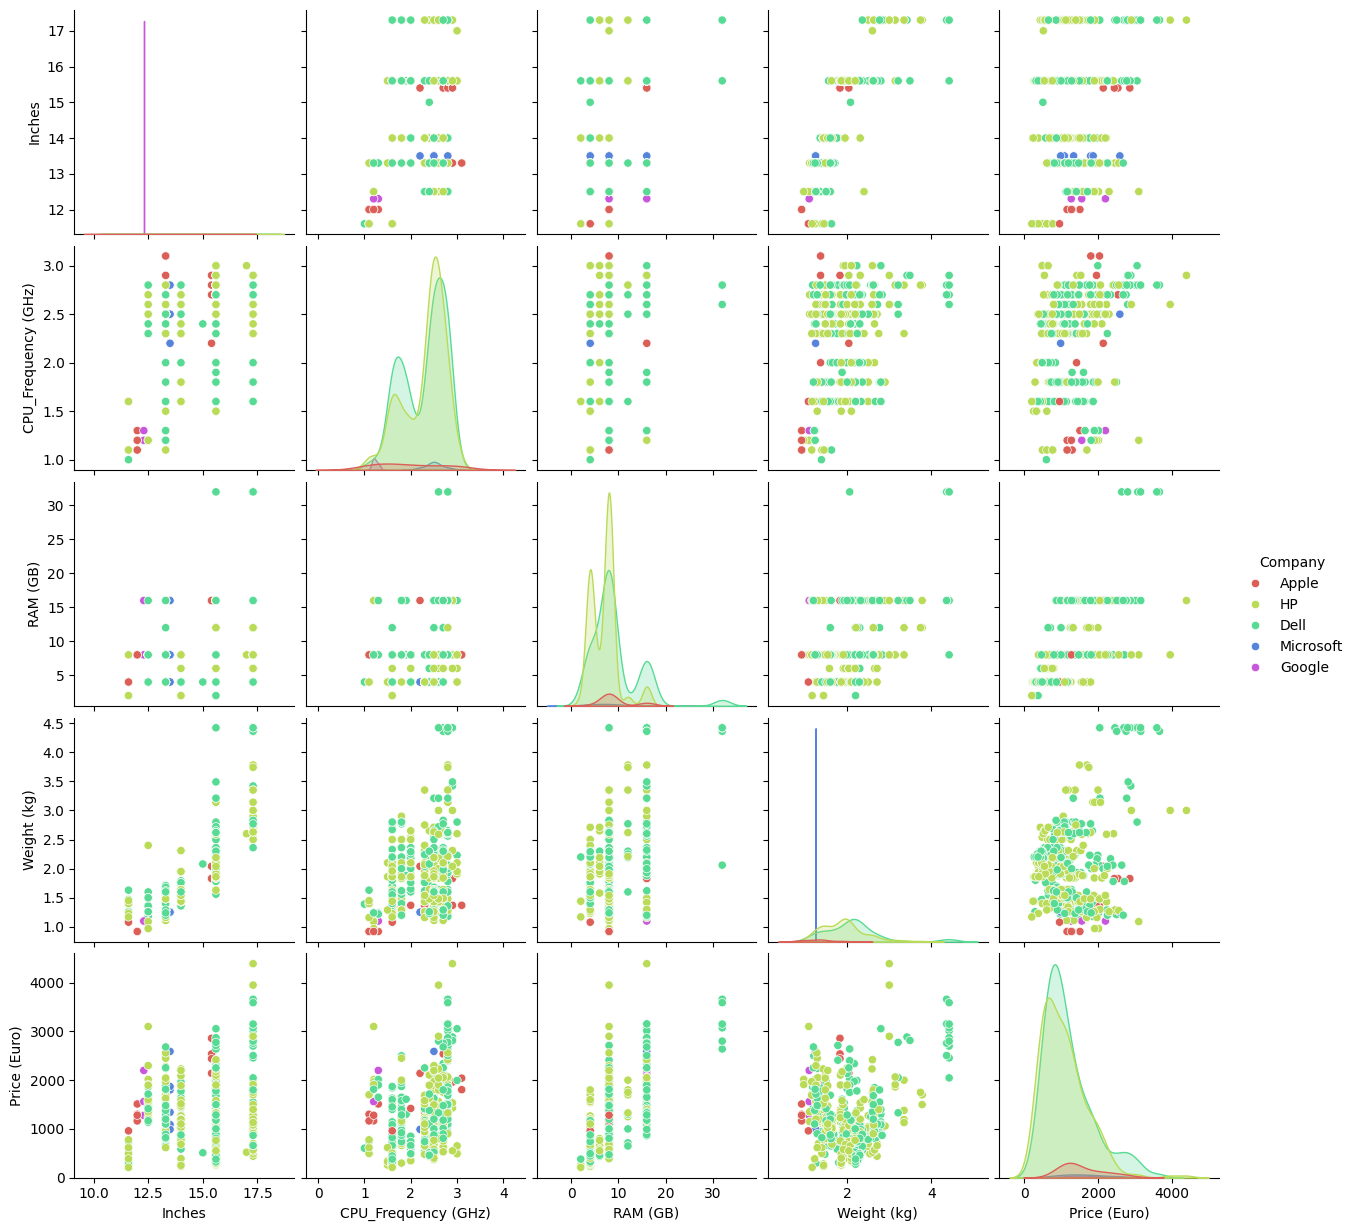

In [23]:
# create a pairplot to see any meaningful relationships across the different columns, colored by company

# select a few companies
filtered_companies_df = df.loc[df["Company"].isin(["Apple", "HP", "Google", "Dell", "Microsoft"])]

sns.pairplot(filtered_companies_df, hue="Company", height=2.5, palette="hls")

We don't see any standout linear relationships in the data here, from this pairplot. But it's helpful in any case to see the general trends between variables.

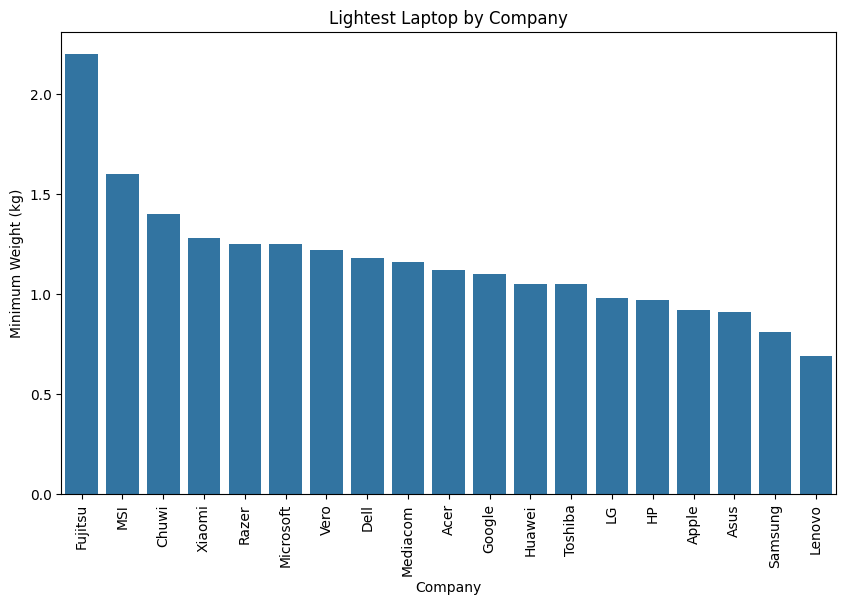

In [24]:
# which company sells the lightest computer?
min_weight_per_company = df.groupby("Company")["Weight (kg)"].min()

# show min weight per company in bar plot
plt.figure(figsize=(10, 6))
sns.barplot(
    x=min_weight_per_company.index,
    y=min_weight_per_company.values,
    order=min_weight_per_company.sort_values(ascending=False).index,
)
plt.tick_params(axis="x", rotation=90)
plt.xlabel("Company")
plt.ylabel("Minimum Weight (kg)")
plt.title("Lightest Laptop by Company")
plt.show()

Therefore, Lenovo sells the lightest laptop.

In [25]:
# what's the most common GPU type?
df_gpu = df.GPU_Type.value_counts()
print(df_gpu.head(1))

GPU_Type
HD Graphics 620    280
Name: count, dtype: int64


Therefore the most common GPU Type is HD Graphics 620.

In [26]:
# checking types of computers
df["TypeName"].unique()

array(['Ultrabook', 'Notebook', 'Netbook', 'Gaming', '2 in 1 Convertible',
       'Workstation'], dtype=object)

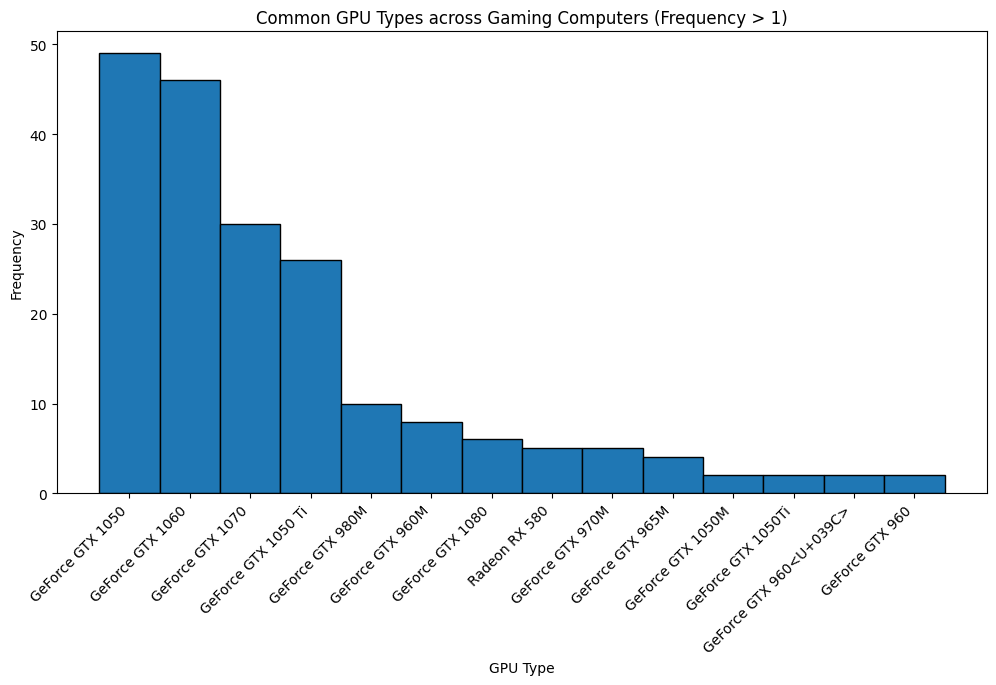

In [27]:
# what are common GPU types for gaming computers?
gaming = df.loc[df["TypeName"] == "Gaming"]["GPU_Type"].value_counts()
gaming_filtered_counts = gaming[gaming > 1]

plt.figure(figsize=(12, 6))
plt.hist(
    gaming_filtered_counts.index,
    weights=gaming_filtered_counts.values,
    bins=np.arange(len(gaming_filtered_counts.index) + 1) - 0.5,
    edgecolor="black",
)
plt.title("Common GPU Types across Gaming Computers (Frequency > 1)")
plt.xlabel("GPU Type")
plt.ylabel("Frequency")
plt.xticks(rotation=45, ha="right")
plt.show()

Therefore, for Gaming computers, the most common GPU type is GeForce GTX 1050. While the 1060 and 1070 outpeform 1050, we may see GTX 1050 more often because it's a cheaper model. We could confirm by checking the prices of each.

In [28]:
# check price of most common gaming GPU
df_gaming_gpu = df.loc[df["GPU_Type"].isin(["GeForce GTX 1050", "GeForce GTX 1070", "GeForce GTX 1060"])]

# average price for each type of GPU
df_gaming_gpu = df_gaming_gpu.groupby("GPU_Type")["Price (Euro)"].mean()
print(df_gaming_gpu.head())

GPU_Type
GeForce GTX 1050    1204.224848
GeForce GTX 1060    1816.698125
GeForce GTX 1070    2611.805333
Name: Price (Euro), dtype: float64


Therefore we confirmed that the 1050 is likely more common because its average price is much lower, per the results from above:
* GeForce GTX 1050: 1204.22
* GeForce GTX 1060: 1816.70
* GeForce GTX 1070: 2611.81